# **Decision Tree**

# **Konsep Dasar Decision Tree**

Decision Tree atau pohon keputusan merupakan salah satu teknik populer dalam pembelajaran mesin (machine learning) yang digunakan untuk klasifikasi dan regresi. Model ini bekerja dengan cara meniru proses pengambilan keputusan manusia, yaitu melalui serangkaian pertanyaan yang bercabang seperti struktur pohon.

Setiap node internal (simpul bukan daun) pada pohon melambangkan suatu pengujian atau kondisi terhadap satu atribut/fitur dari data. Sementara itu, setiap cabang (edge) yang keluar dari node menggambarkan hasil dari pengujian tersebut (misalnya “ya” atau “tidak”). Proses ini terus berlanjut sampai ke node daun (leaf node), yang berisi prediksi akhir berupa label kelas (untuk klasifikasi) atau nilai numerik (untuk regresi).

Decision Tree memecah data secara rekursif, artinya pembagian data dilakukan berulang kali, berdasarkan kriteria tertentu seperti:

- Information Gain (pengurangan entropi)

- Gini Index (ukuran ketidakteraturan)

Model ini memiliki keunggulan dalam hal interpretabilitas (mudah dipahami manusia), tetapi memiliki kekurangan yaitu cenderung overfitting jika struktur pohon terlalu dalam atau kompleks.


# **Partisi Data dalam Algoritma Decision Tree**

Dalam algoritma **Decision Tree**, langkah penting yang dilakukan adalah **pembagian (partisi)** dataset ke dalam dua subset berdasarkan nilai dari fitur tertentu.  
Tujuan dari proses ini adalah untuk **memisahkan data menjadi kelompok-kelompok yang lebih homogen (murni)** agar keputusan klasifikasi menjadi lebih akurat.

Pada setiap tahap pemisahan, algoritma akan:

- Memilih fitur yang paling informatif  
- Menentukan nilai ambang batas (*threshold*) optimal  
- Melakukan pemisahan berdasarkan nilai tersebut  

Kriteria pemilihan fitur dan threshold ini biasanya berdasarkan **skor evaluasi**, seperti *Information Gain* atau *Gini Index*, untuk memperoleh hasil partisi terbaik (kemurnian paling tinggi).

---

### 📐 Notasi dan Rumus

Misalkan:

- \( D \): Dataset awal sebelum partisi  
- \( x_j \): Nilai fitur ke-\( j \) dari sebuah data  
- \( v \): Nilai *threshold* untuk fitur ke-\( j \)  
- \( D_{\leq v} \): Subset data di mana \( x_j \leq v \)  
- \( D_{> v} \): Subset data di mana \( x_j > v \)  

Maka proses partisinya dapat dituliskan sebagai:

\[
D \rightarrow
\begin{cases}
D_{\leq v} = \{ x \in D \mid x_j \leq v \} \\
D_{> v} = \{ x \in D \mid x_j > v \}
\end{cases}
\]

---

### ⚙️ Proses Implementasi

Dalam praktiknya:

- Algoritma mencoba berbagai nilai *threshold* untuk setiap fitur.  
- Setiap partisi diuji menggunakan fungsi evaluasi (misalnya *Information Gain*).  
- Fitur dan threshold yang menghasilkan subset dengan **kemurnian (purity)** tertinggi akan dipilih sebagai pemisahan terbaik pada simpul tersebut.  

Dengan cara ini, decision tree secara bertahap membentuk struktur bercabang yang mengarahkan data menuju **simpul akhir (leaf)** dengan **prediksi kelas** yang jelas.


# **Kebenaran (Purity) Suatu Node**

Purity atau kemurnian adalah ukuran yang menggambarkan seberapa seragam (homogen) label-label kelas dalam suatu simpul pohon. Semakin tinggi proporsi data dalam satu simpul yang berasal dari kelas yang sama, maka semakin tinggi kemurniannya.

Contoh:

Jika suatu node hanya berisi data dari satu kelas, maka node tersebut dikatakan murni sempurna (purity = 1).

Jika data dalam simpul terdiri dari berbagai kelas secara seimbang, maka node tersebut tidak murni (purity mendekati 0.5 atau bahkan lebih kecil).

Rumus Sederhana untuk Menghitung Purity:
Jika:

𝑛
n adalah jumlah total data dalam simpul

𝑛
max
n
max
​
  adalah jumlah data dari kelas mayoritas dalam simpul tersebut

Maka:

Purity
=
𝑛
max /
n


Rumus ini menunjukkan bahwa purity adalah persentase data terbanyak dari satu kelas tertentu dibandingkan jumlah total data dalam simpul.

Kesimpulan
Decision Tree membentuk model prediksi dalam struktur bercabang, mirip pohon, berdasarkan hasil pengujian fitur-fitur data.

Partisi data adalah langkah penting untuk memisahkan data menjadi bagian yang lebih mudah diklasifikasi.

Purity adalah ukuran seberapa homogen data dalam satu simpul, dan menjadi indikator penting dalam menentukan kualitas partisi.

# **Visualisasi partisi node**

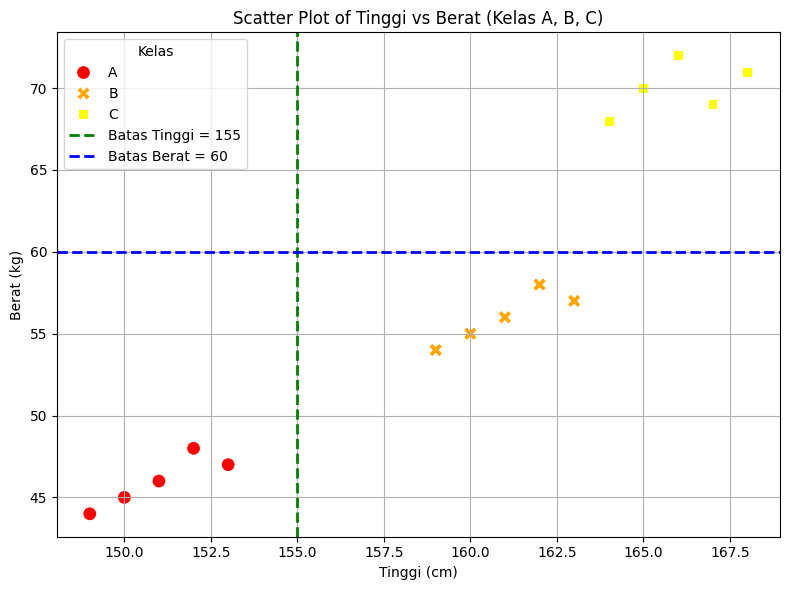

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
data = {
    'Tinggi': [150, 152, 151, 149, 153, 160, 162, 161, 163, 159, 165, 166, 164, 167, 168],
    'Berat':  [45, 48, 46, 44, 47,  55,  58,  56,  57,  54,  70, 72, 68, 69, 71],
    'Kelas':  ['A','A','A','A','A','B','B','B','B','B','C','C','C','C','C']
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Tinggi',
    y='Berat',
    hue='Kelas',
    style='Kelas',
    palette={'A': 'red', 'B': 'orange', 'C': 'yellow'},
    s=100
)

# Tambahkan garis batas manual (contoh threshold tinggi = 165)
plt.axvline(x=155, color='green', linestyle='--', linewidth=2, label='Batas Tinggi = 155')
plt.axhline(y=60, color='blue', linestyle='--', linewidth=2, label='Batas Berat = 60')

# Label dan judul
plt.title('Scatter Plot of Tinggi vs Berat (Kelas A, B, C)')
plt.xlabel('Tinggi (cm)')
plt.ylabel('Berat (kg)')

# Legenda dan grid
plt.legend(title='Kelas')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Berikut adalah Perhitungan secara Manual**

https://docs.google.com/spreadsheets/d/1KbdbI9ayymw0O8mLwRWMPhBCRazQGpBIb3JWPGagLCI/edit?usp=sharing

Berikut adalah rules nya :

1. R1 : jika x1 ≤ 155, maka kelasnya adalah c1 (A)

2. R2 : jika x1 > 155 dan x2 ≤ 60, maka kelasnya adalah c2 (B)

3. R3 : jika x1 > 155 dan x2 > 60, maka kelasnya adalah c3 (C)

# **Komputasi dengan library sklearn**


Confusion Matrix:
[[1 0 0]
 [0 1 0]
 [0 0 1]]

Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           B       1.00      1.00      1.00         1
           C       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Data Baru 1: Tinggi = 154 cm, Berat = 50 kg -> Prediksi Kelas: A
Data Baru 2: Tinggi = 165 cm, Berat = 62 kg -> Prediksi Kelas: B


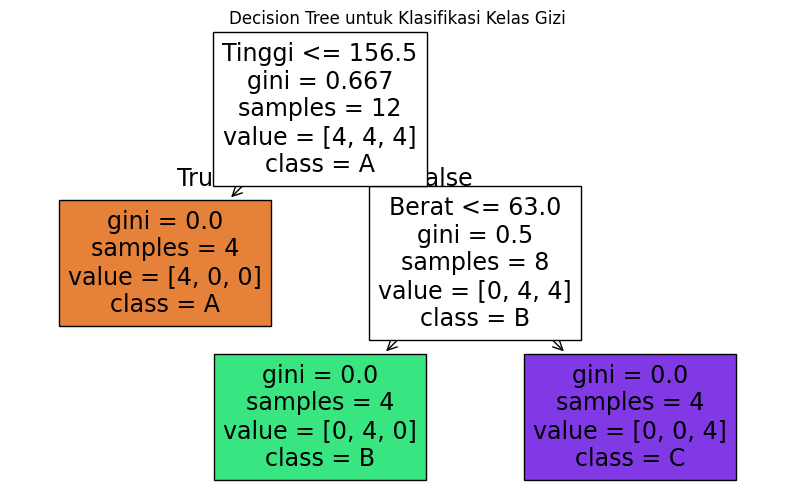

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Dataset
data = {
    'Tinggi': [150, 152, 151, 149, 153, 160, 162, 161, 163, 159, 165, 166, 164, 167, 168],
    'Berat':  [45,  48,  46,  44,  47,  55,  58,  56,  57,  54,  70,  72,  68,  69,  71],
    'Kelas':  ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']
}
df = pd.DataFrame(data)

# Fitur dan label
X = df[['Tinggi', 'Berat']]
y = df['Kelas']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Dua data baru yang ingin diklasifikasikan
data_baru = pd.DataFrame({
    'Tinggi': [154, 165],   # Data baru 1 dan 2
    'Berat': [50, 62]
})

# Prediksi kelas untuk data baru
prediksi = clf.predict(data_baru)

# Tampilkan hasil prediksi
for i, kelas in enumerate(prediksi, start=1):
    print(f"Data Baru {i}: Tinggi = {data_baru.iloc[i-1]['Tinggi']} cm, Berat = {data_baru.iloc[i-1]['Berat']} kg -> Prediksi Kelas: {kelas}")


# Visualisasi pohon keputusan
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['Tinggi', 'Berat'], class_names=clf.classes_, filled=True)
plt.title("Decision Tree untuk Klasifikasi Kelas Gizi")
plt.show()